In [7]:
# Read all lines from the file
import pandas as pd
import matplotlib.pyplot as plt

def define_table(path, has_params: bool = False):
    with open(path, 'r') as f:
        params = None
        if has_params: params = [param.strip() for param in f.readline().split(",")]
        lines = f.readlines()
    # Remove whitespace characters like `\n` at the end of each line
        lines = [x.strip()[1:-1] for x in lines]
    # Transform lines into a list of tuples
        lines = [tuple(x.split(",")) for x in lines]
    # Transform list of tuples into a dictionary
        df = pd.DataFrame(lines, columns=['i', 'j', 'temperature', 'score'])
        df['temperature'] = df['temperature'].astype(float)
        df['score'] = df['score'].astype(int)
        df['i'] = df['i'].astype(int)
        df['j'] = df['j'].astype(int)
        table = df
    return table,params


In [10]:
import os
import re

# For all files in a directory
# read all lines from the file
directory = '../out'
directories = [ os.path.join('../out', directory) for directory in os.listdir(directory) \
               if os.path.isdir(os.path.join('../out', directory)) \
                and re.match(r'comp\d+', directory) ]
file_paths = []
for directory in directories:
    file_paths.extend([os.path.join(directory, file) for file in os.listdir(directory) \
                       if os.path.isfile(os.path.join(directory, file))])

Score: 0


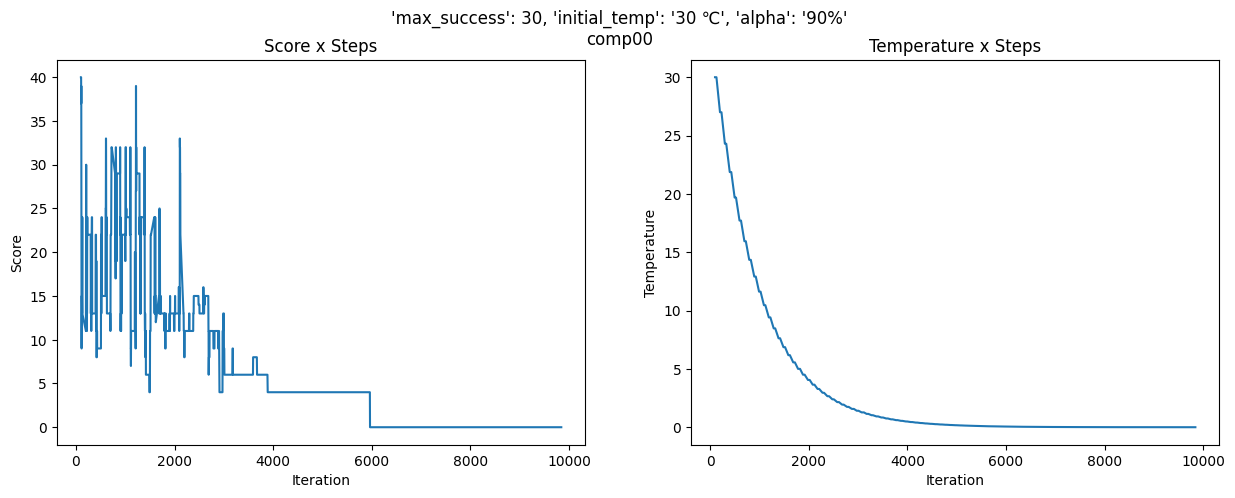

Score: 0


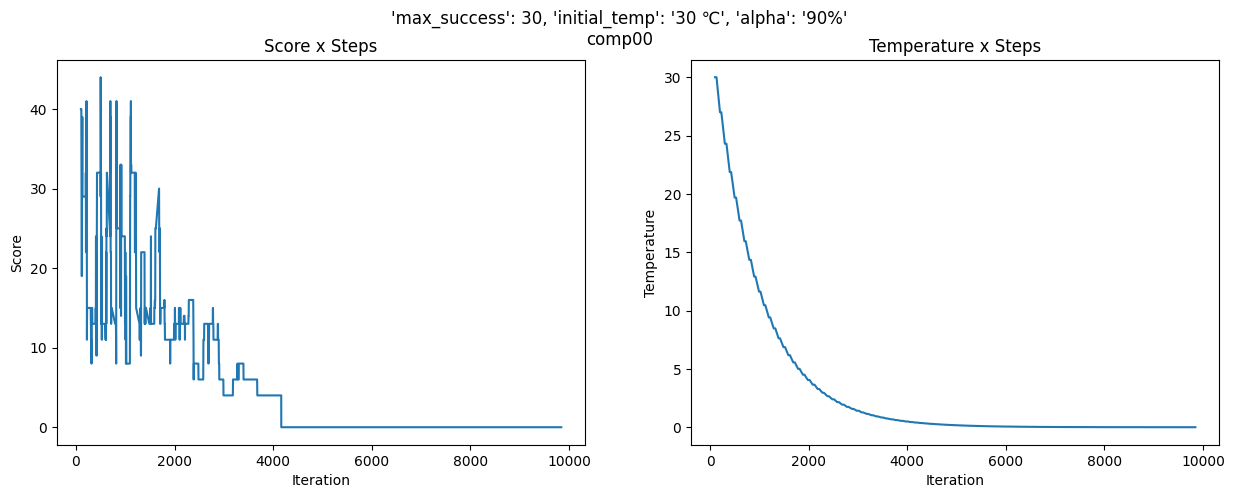

Score: 0


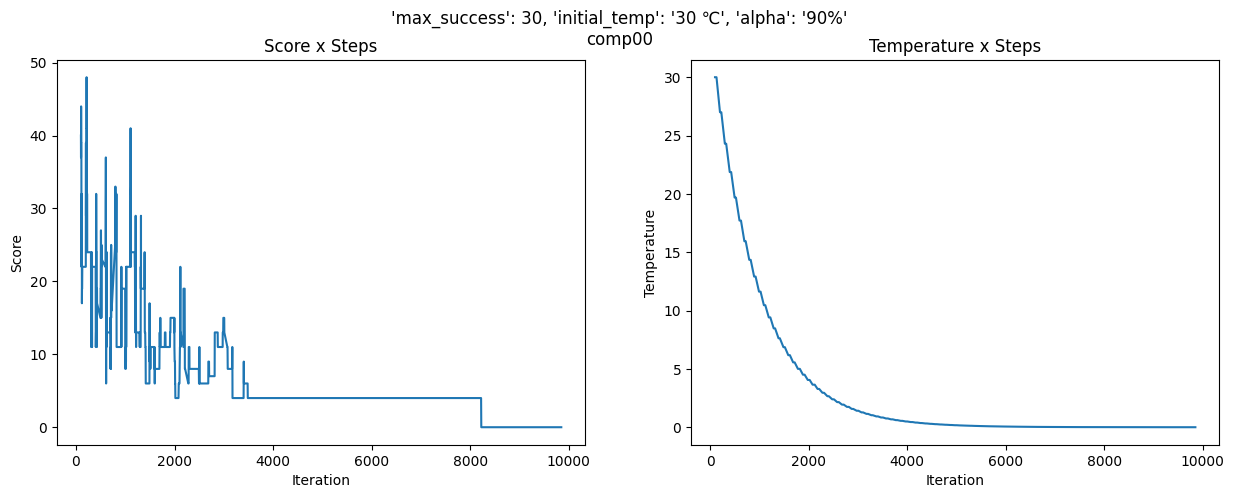

Score: 21


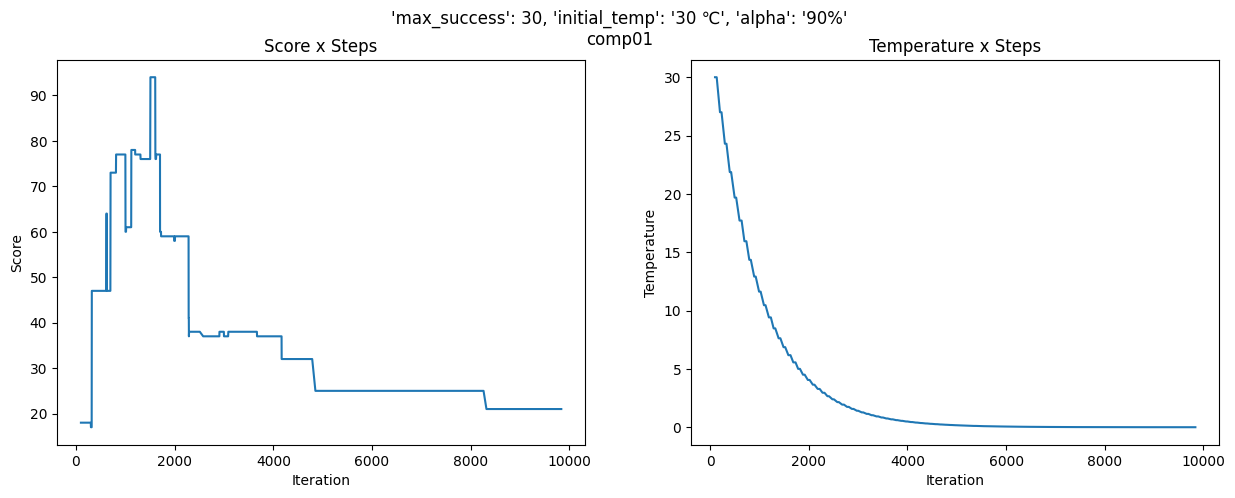

Score: 69


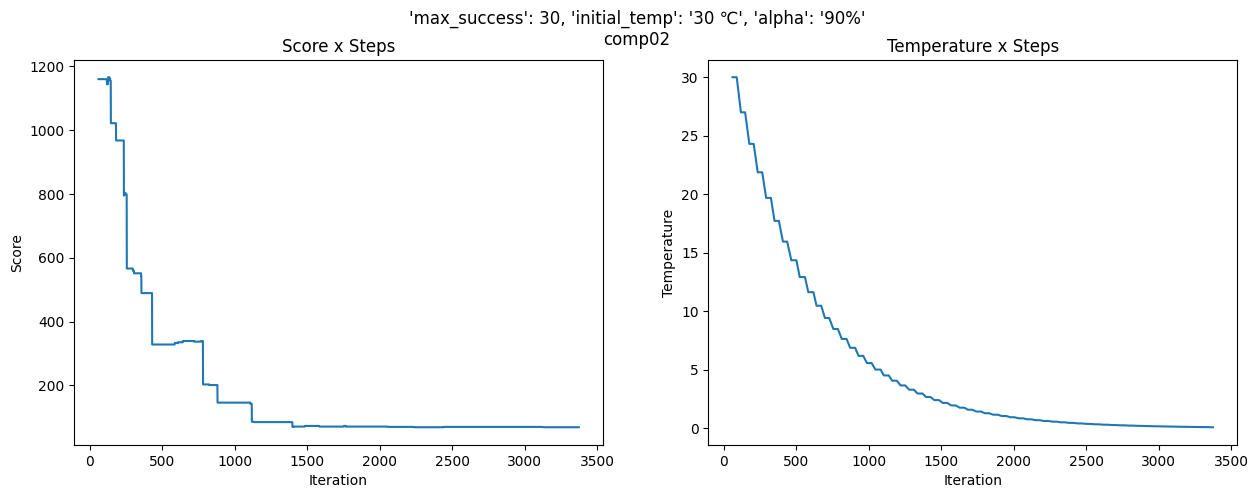

Score: 257


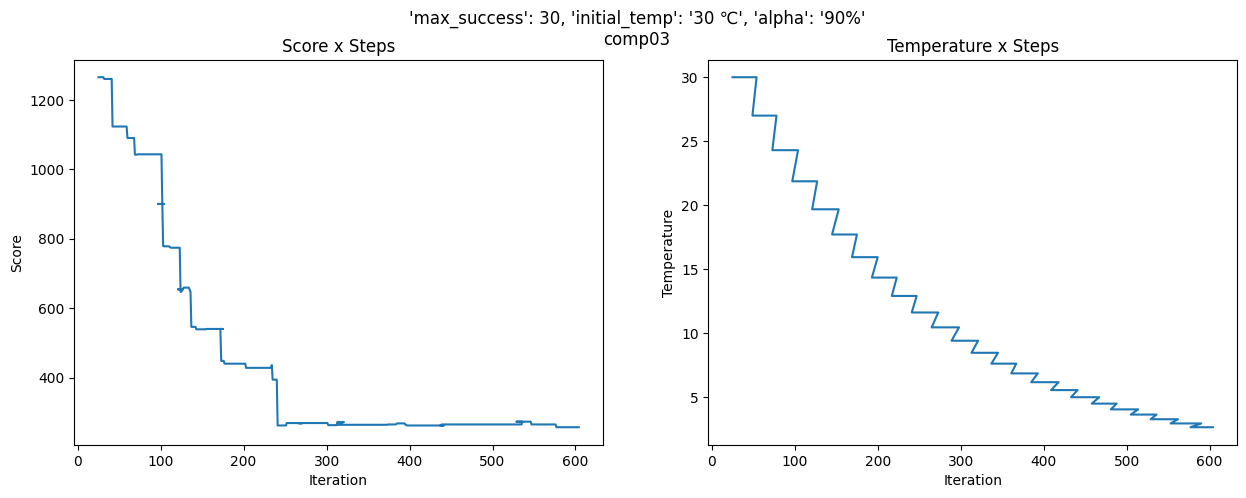

Score: 25


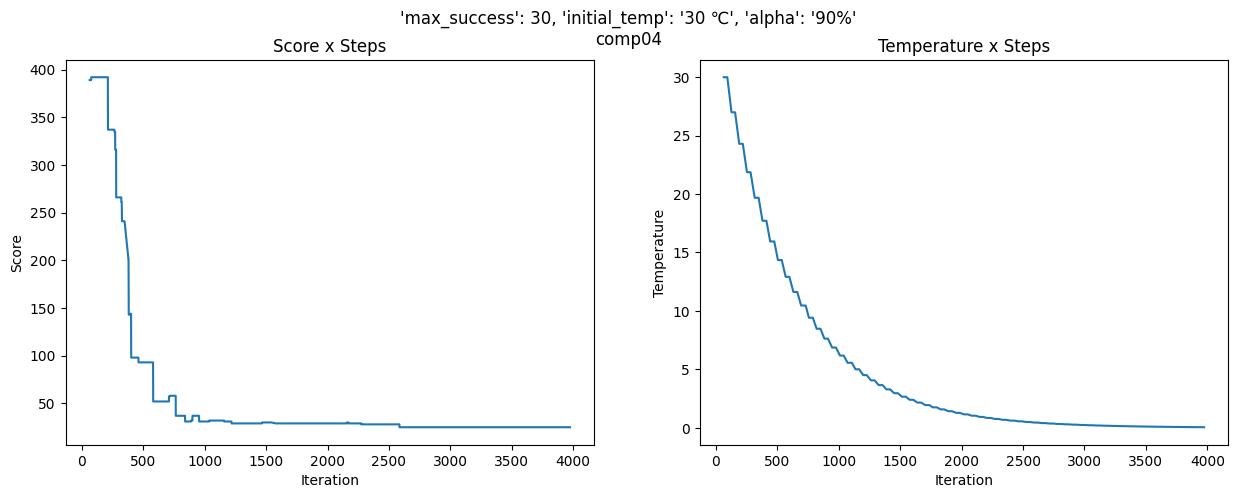

Score: 114


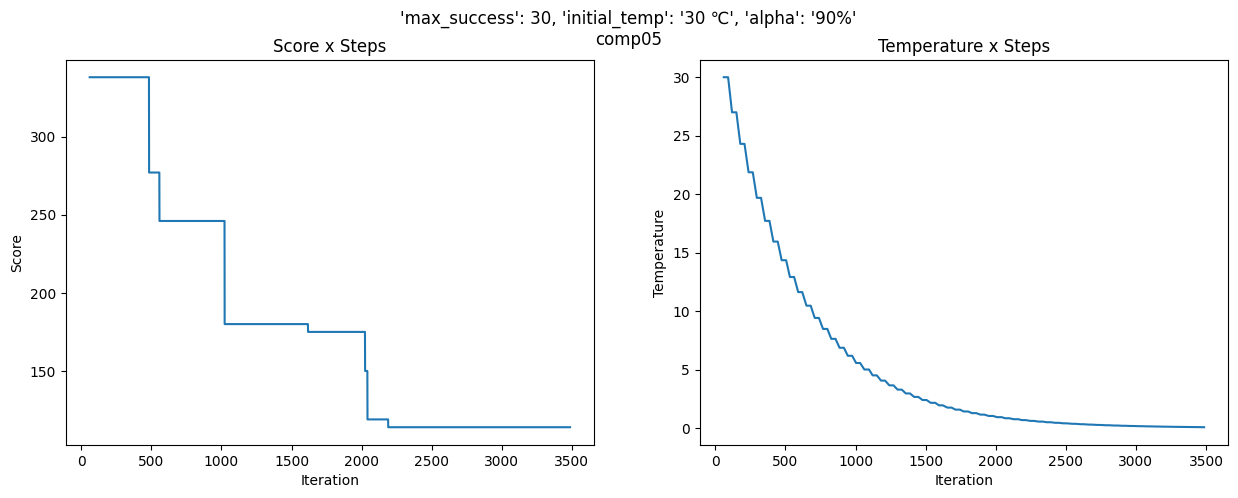

Score: 17


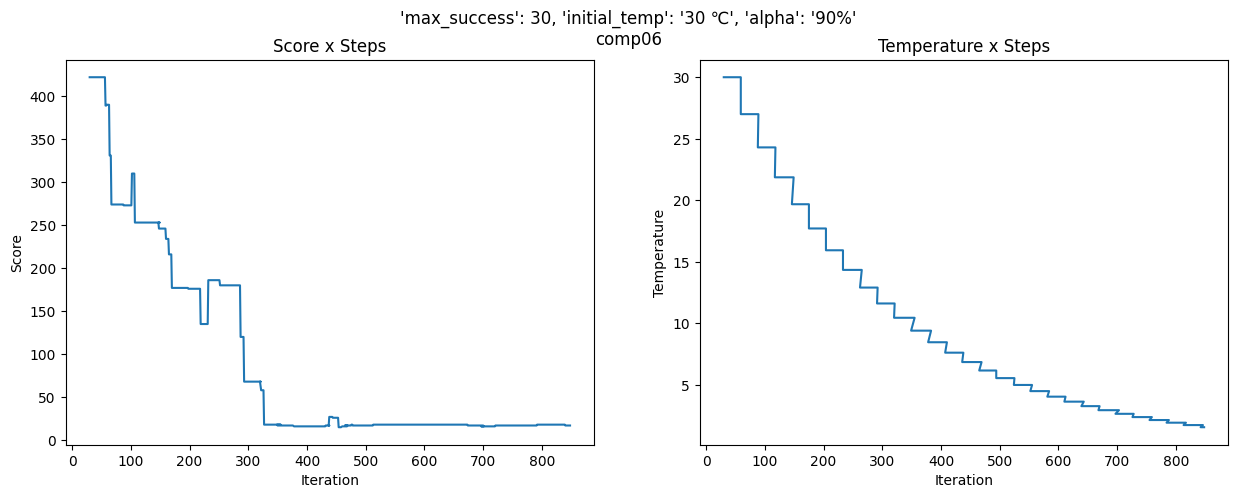

Score: 43


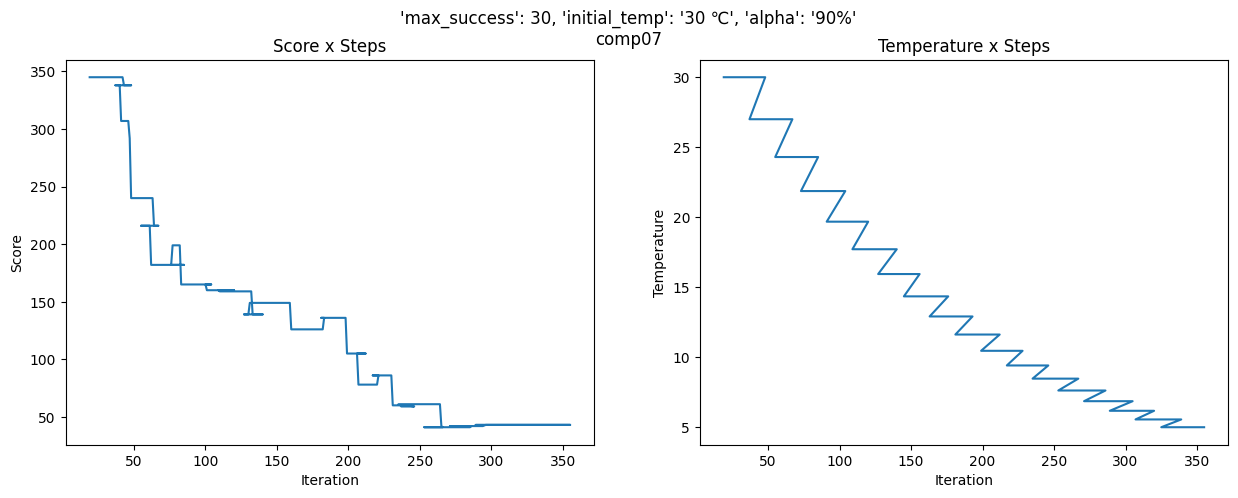

Score: 25


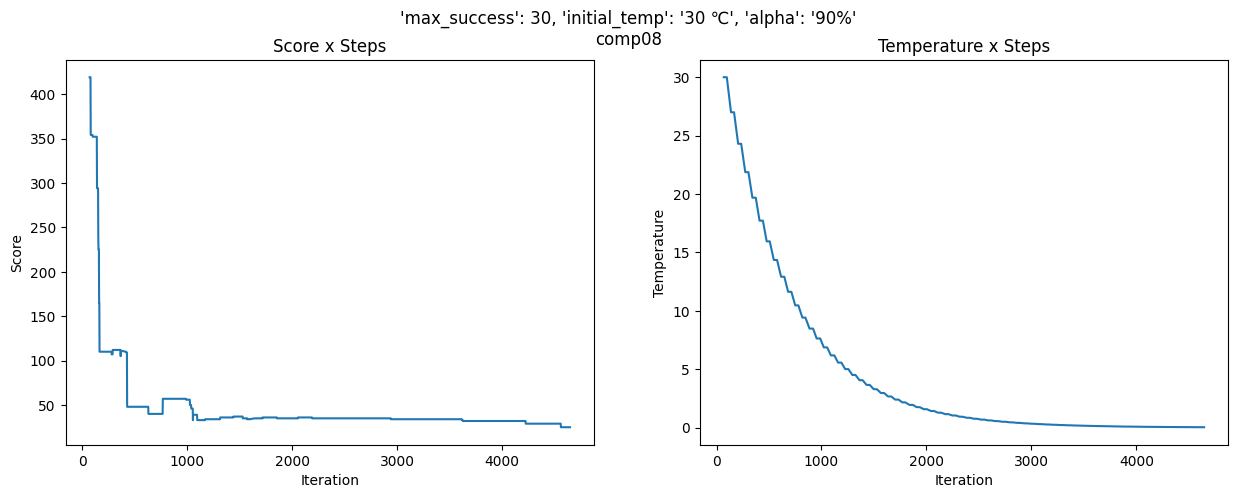

Score: 56


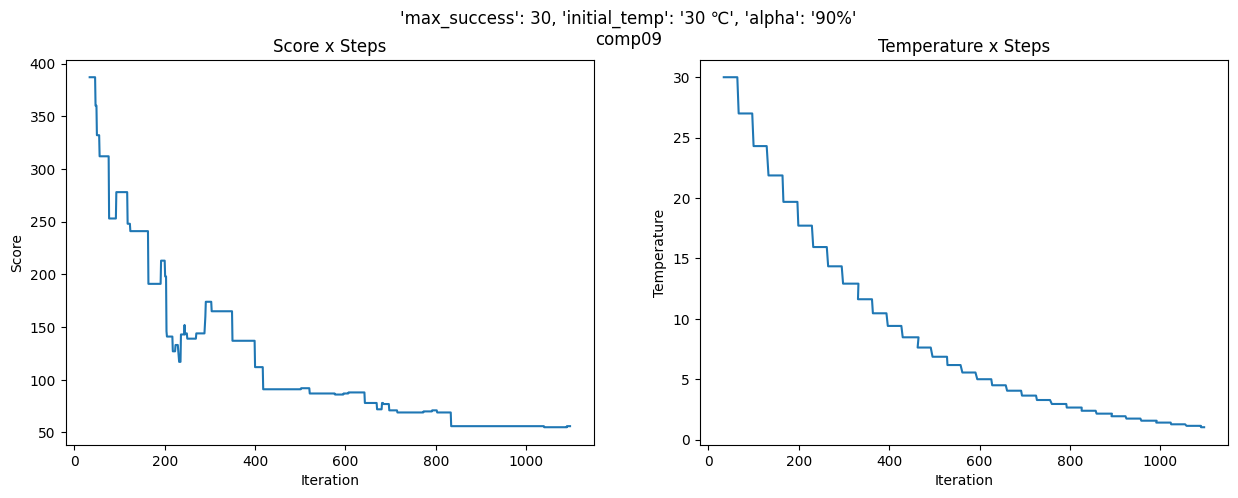

Score: 74


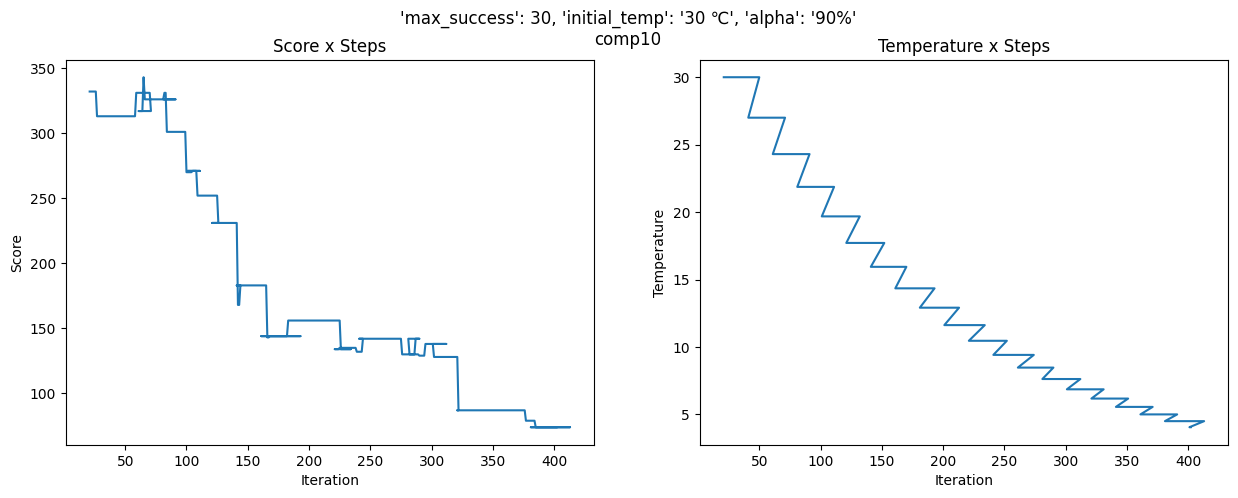

Score: 10


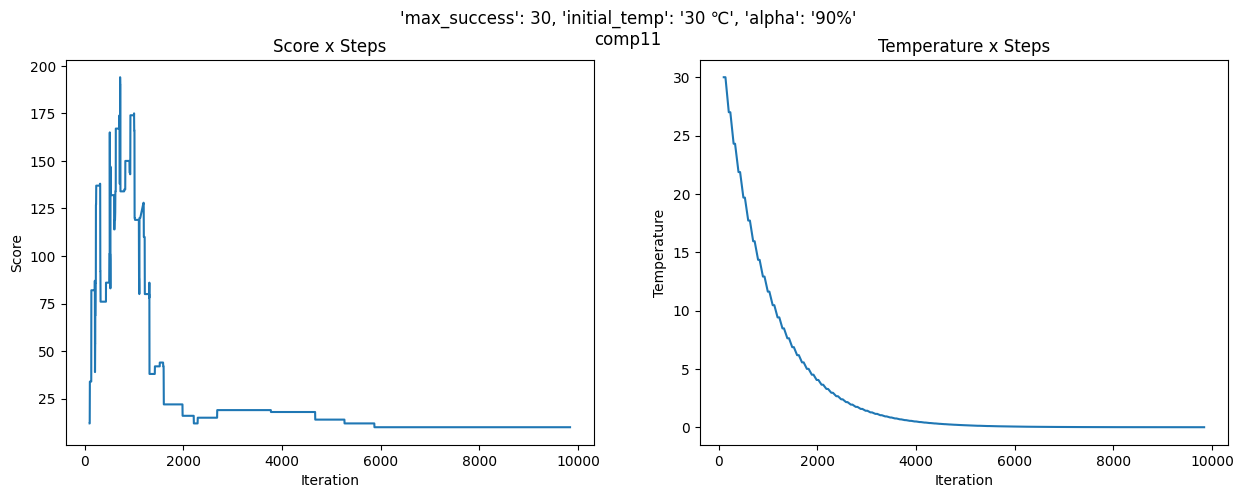

Score: 57


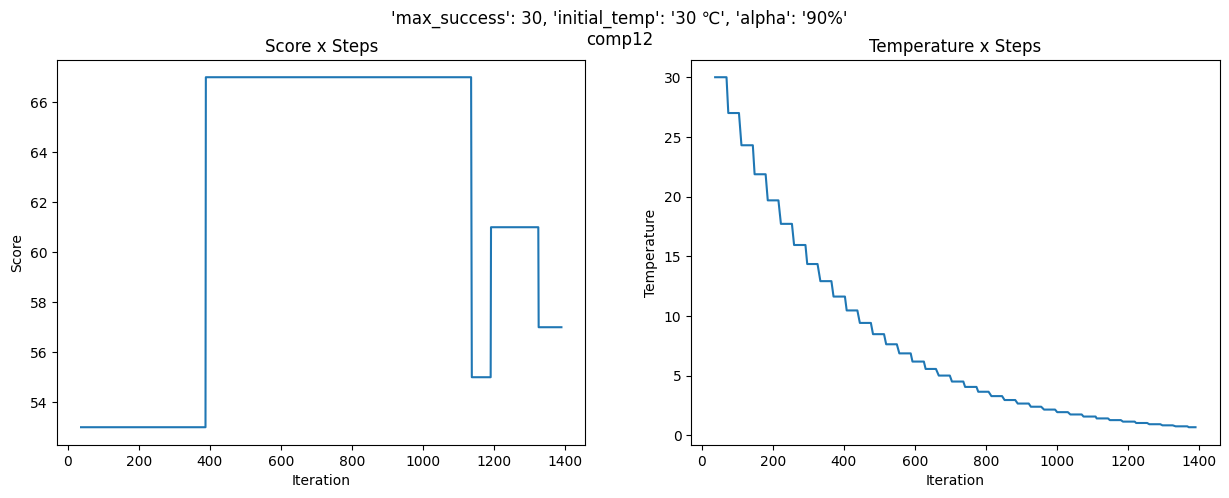

Score: 71


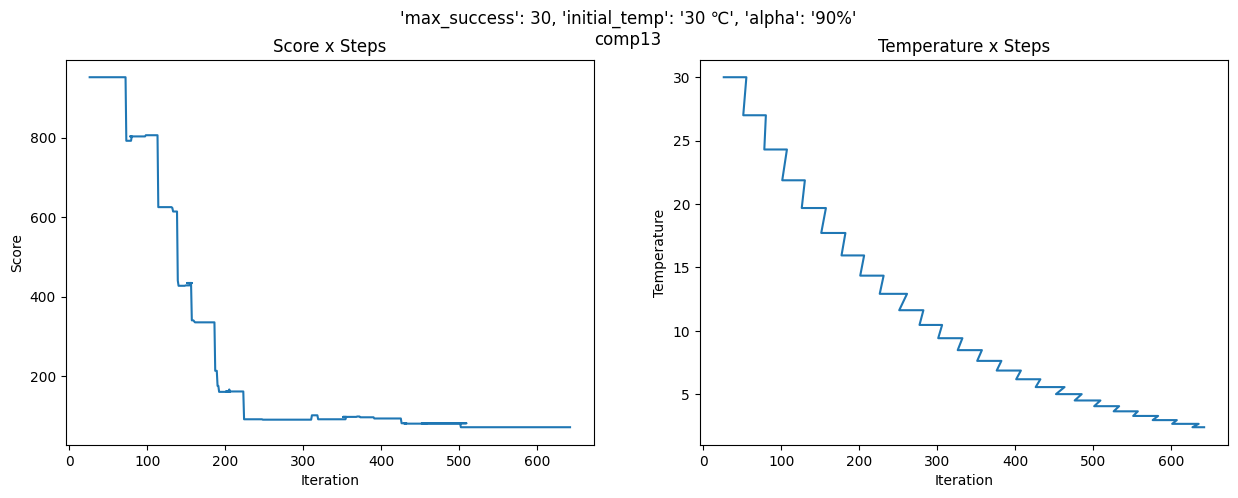

Score: 14


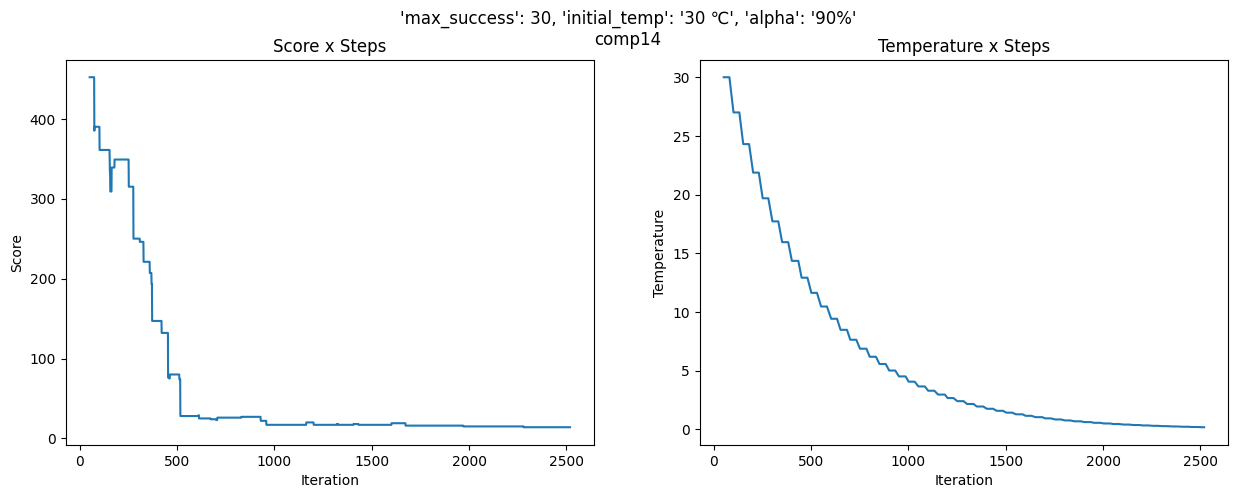

Score: 100


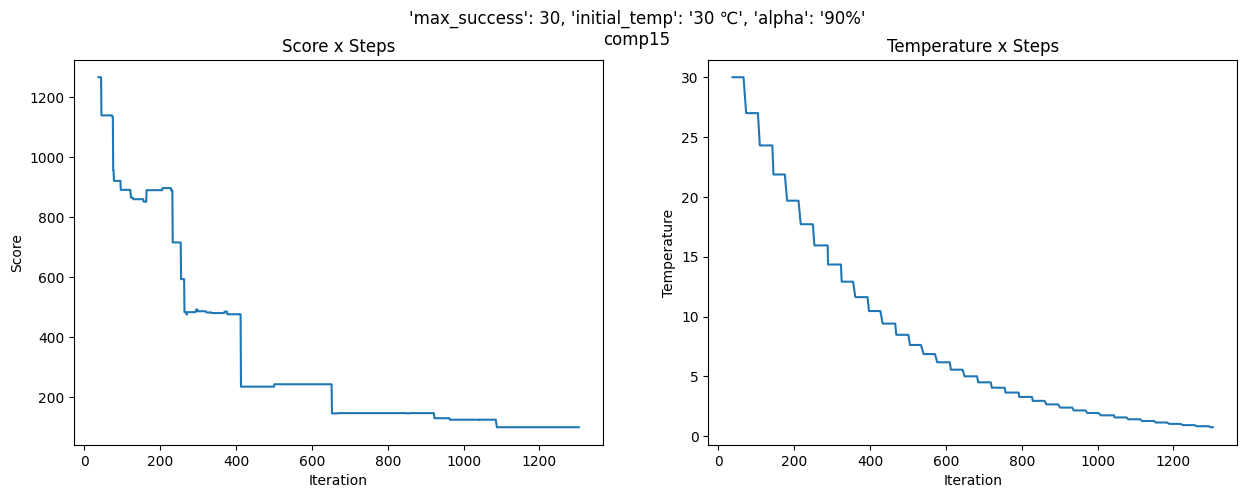

Score: 71


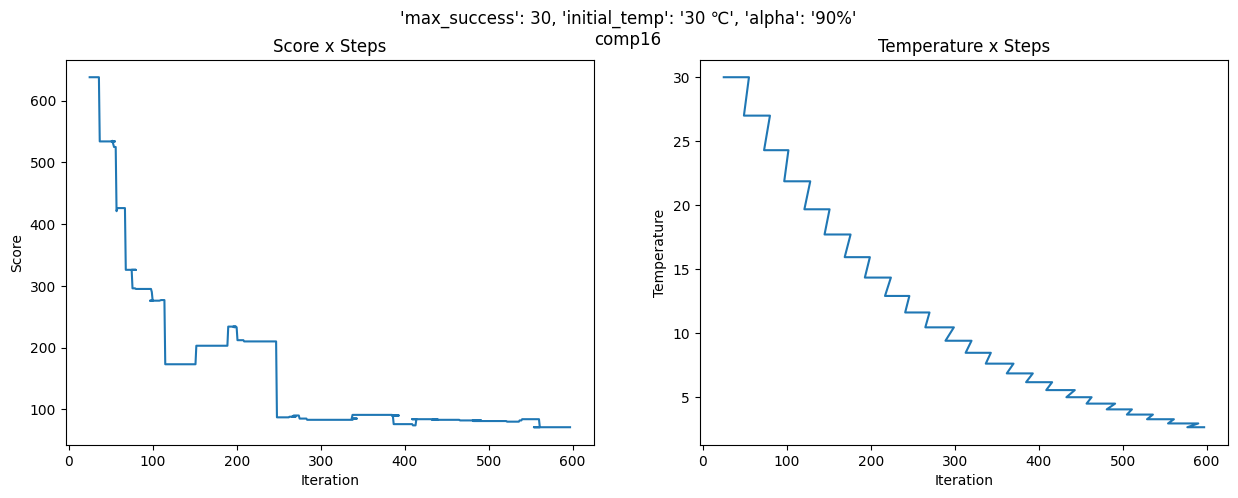

Score: 16


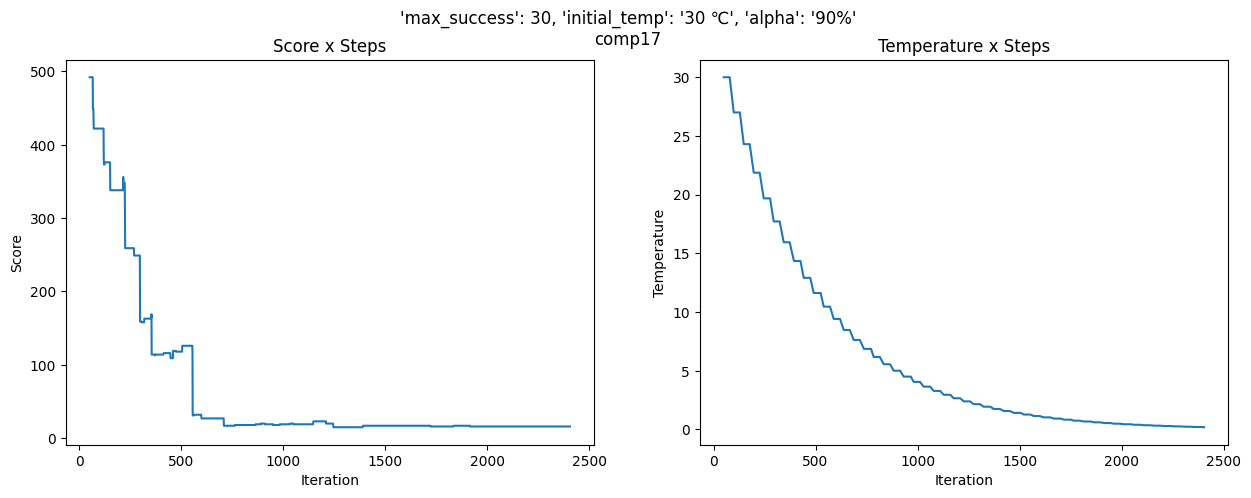

Score: 22


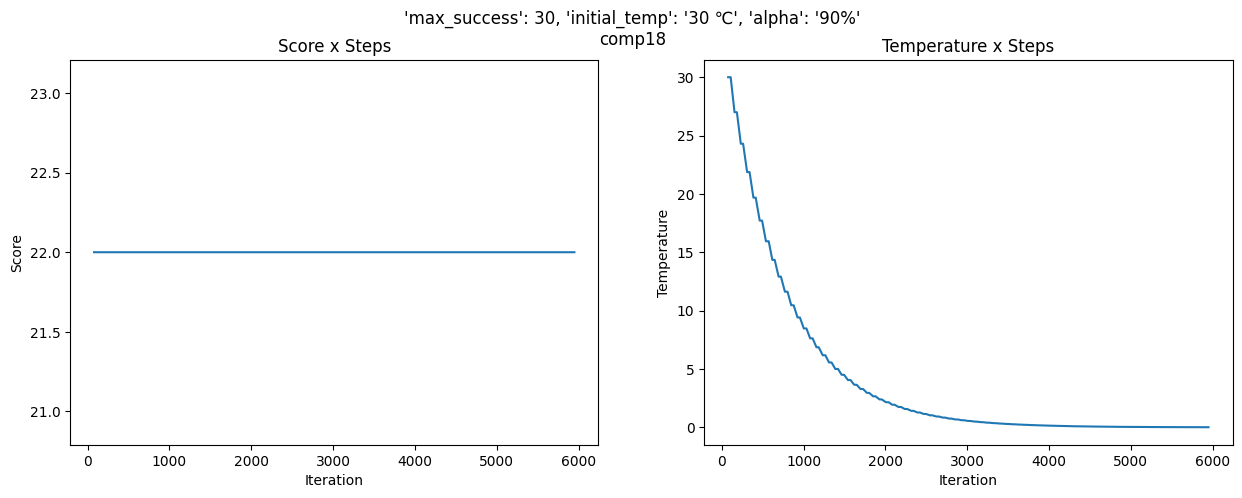

Score: 81


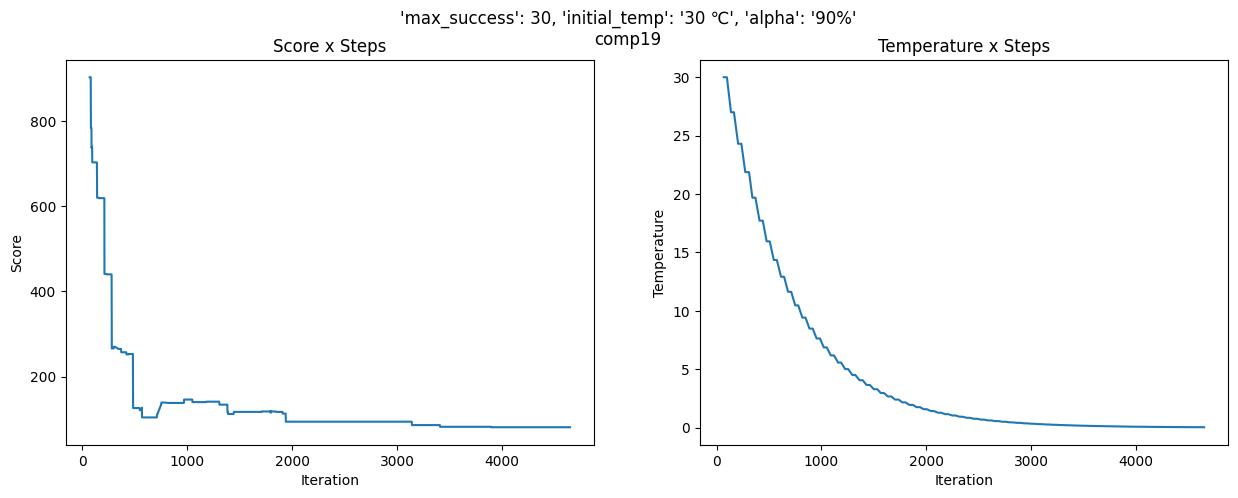

Score: 44


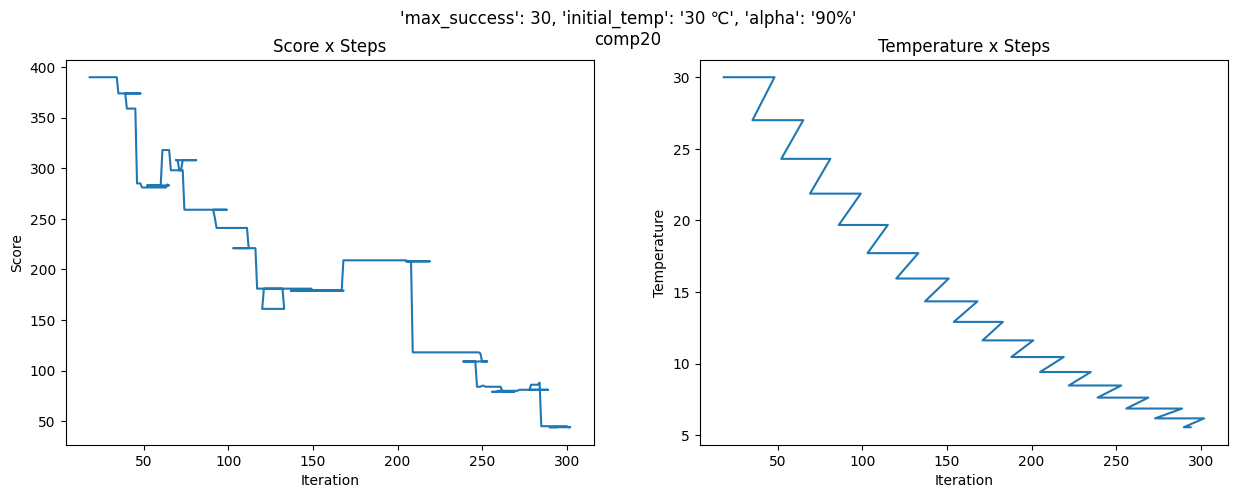

Score: 90


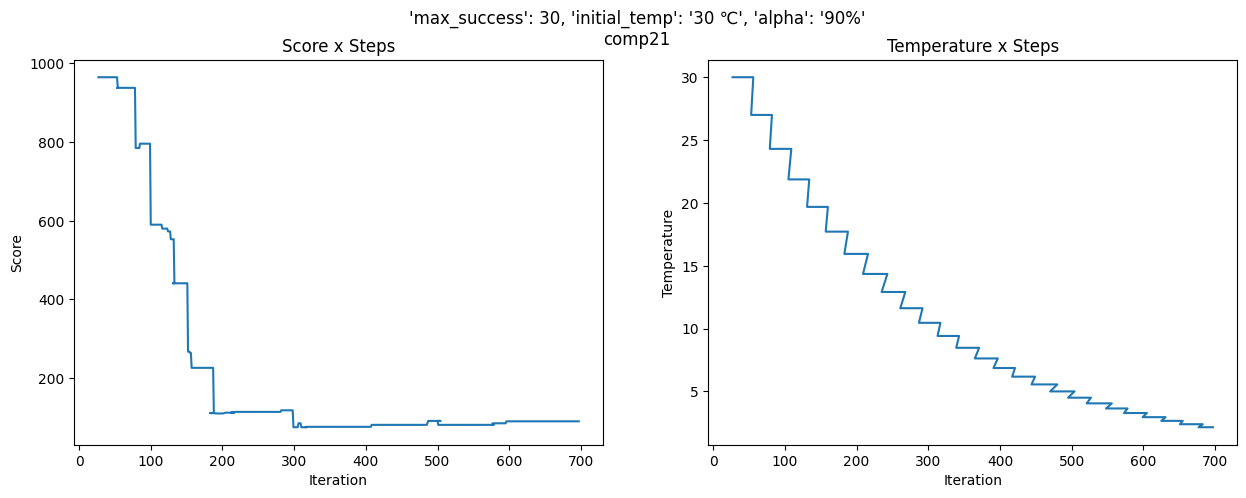

In [11]:
for file_path in file_paths:
    table, params = define_table(file_path, True)
    
    params_dict = dict([
        ("max_success", int(params[2])),
        ("initial_temp", f"{int(params[3])} ℃"),
        ("alpha", f"{float(params[4]):.0%}"),
    ])

    # Print the last value for score
    print(f"Score: {table['score'].iloc[-1]}")


    figure, axis = plt.subplots(1, 2)

    figure.set_figwidth(15)
    figure.set_figheight(5)
    # Set title to figure
    figure.suptitle(str(params_dict)[1:-1] + "\n" + file_path.split("_")[1])

    # 0 : Score x Steps
    axis[0].plot(table['i']*max(table['i'])+table['j'], table['score'])
    axis[0].set_title('Score x Steps')
    axis[0].set_xlabel('Iteration')
    axis[0].set_ylabel('Score')

    # 1 : Temperature x Steps
    axis[1].plot(table['i']*max(table['i'])+table['j'], table['temperature'])
    axis[1].set_title('Temperature x Steps')
    axis[1].set_xlabel('Iteration')
    axis[1].set_ylabel('Temperature')

    plt.show()
